In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

data = pd.read_csv('PurchasesFINAL12312016.csv')
data.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [10]:
df = data.copy()
date_col = ['PODate', 'ReceivingDate', 'InvoiceDate','PayDate']
df[date_col] = df[date_col].apply(pd.to_datetime)
str_col = ['Store','Brand','Classification','VendorNumber','PONumber']
df[str_col] = df[str_col].astype(str)
df['LeadTime'] = (df['InvoiceDate'] - df['ReceivingDate']).dt.days
df['OrderTime'] = (df['ReceivingDate'] - df['PODate']).dt.days
df['PaymentLT'] = (df['PayDate'] - df['InvoiceDate']).dt.days
df.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,LeadTime,OrderTime,PaymentLT
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1,2,12,43
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1,6,10,45
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1,5,11,45
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1,6,10,45
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1,7,9,38


In [12]:
df['InventoryId'].str.split('_', expand=True)
df[['Split_1', 'InventoryCategory', 'Split_3']] = df['InventoryId'].str.split('_', expand=True)
df = df.drop(columns=['Split_1', 'Split_3'])
df.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,LeadTime,OrderTime,PaymentLT,InventoryCategory
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1,2,12,43,MOUNTMEND
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1,6,10,45,CULCHETH
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1,5,11,45,PITMERDEN
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1,6,10,45,HARDERSFIELD
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1,7,9,38,DONCASTER


In [13]:
df1 = df.copy()
df1 = df[df['InventoryCategory'] != '']
print(df.shape, df1.shape)

(2372474, 20) (2370748, 20)


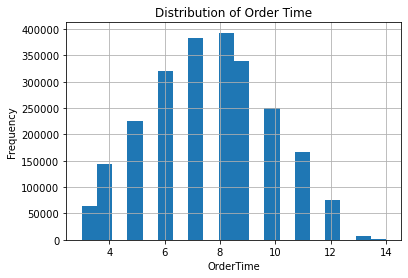

In [17]:
df1['OrderTime'].hist(bins=20)
plt.title('Distribution of Order Time')
plt.xlabel('OrderTime')
plt.ylabel('Frequency')
plt.show()

In [20]:
df1.groupby('VendorNumber').agg({
    'LeadTime': ['mean', 'min', 'max'],
    'OrderTime': ['mean', 'min', 'max'],
    'PaymentLT': ['mean',  'min', 'max']
})
summary_vendor = df1.groupby('VendorNumber').agg({
                'LeadTime': ['mean', 'min', 'max'],
                'OrderTime': ['mean', 'min', 'max'],
                'PaymentLT': ['mean',  'min', 'max']
            })

summary_vendor.sort_values(('OrderTime', 'mean'), ascending=False).head(5)

LeadTime          OrderTime          PaymentLT        
                   mean min max       mean min max       mean min max
VendorNumber                                                         
201359         9.000000   9   9  13.000000  13  13  38.000000  38  38
54             7.000000   7   7  10.000000  10  10  44.000000  44  44
4901          11.000000  11  11  10.000000  10  10  41.000000  41  41
2              9.307692   4  11   9.615385   7  11  31.923077  27  48
90059          7.431818   2  13   9.318182   5  13  32.727273  29  40

In [21]:
# Get the sorted top 5 rows based on 'OrderTime' mean
top_bad_5 = summary_vendor.sort_values(('OrderTime', 'mean'), ascending=False).head(5)

# Retrieve the index of the top 5 rows
top_bad_5_index = top_bad_5.index.tolist()

print(top_bad_5_index)

['201359', '54', '4901', '2', '90059']


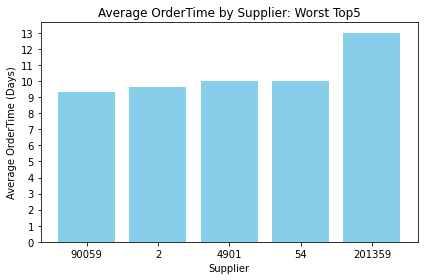

In [69]:
filtered_top5_bad_vendor= df1[df1['VendorNumber'].isin(top_bad_5_index)]
# Group by Supplier and calculate the mean lead-time
supplier_performance = filtered_top5_bad_vendor.groupby('VendorNumber')['OrderTime'].mean().reset_index()

#Sort by ascending 
supplier_performance = supplier_performance.sort_values(by='OrderTime', ascending=True)

# Plot the lead-time performance using a bar chart
plt.bar(supplier_performance['VendorNumber'], supplier_performance['OrderTime'], color='skyblue')

# Add titles and labels
plt.title('Average OrderTime by Supplier: Worst Top5')
plt.xlabel('Supplier')
plt.ylabel('Average OrderTime (Days)')

plt.yticks(ticks=range(0, int(supplier_performance['OrderTime'].max()) + 1))

# Display the chart
plt.tight_layout()
plt.show()

In [61]:
summary_vendor = df1.groupby('InventoryCategory').agg({
    'Quantity': ['sum']
    
})
summary_vendor['Quantity_MonthAVG']=summary_vendor['Quantity']/6
Quantity_MonthAVG = summary_vendor.sort_values(('Quantity_MonthAVG'), ascending=False).head()
Quantity_MonthAVG

,Quantity,Quantity_MonthAVG
,sum,
InventoryCategory,,
MOUNTMEND,3043220,507203.333333
DONCASTER,2944323,490720.500000
EANVERNESS,2342753,390458.833333
GOULCREST,1797410,299568.333333
HORNSEY,1508244,251374.000000


In [47]:
top_5 = summary_vendor.sort_values(('Quantity_MonthAVG'), ascending=False).head()
top_5_index = top_5.index.tolist()
top_5_index

['MOUNTMEND', 'DONCASTER', 'EANVERNESS', 'GOULCREST', 'HORNSEY']

Text(0, 0.5, 'Average Quantity (Months)')

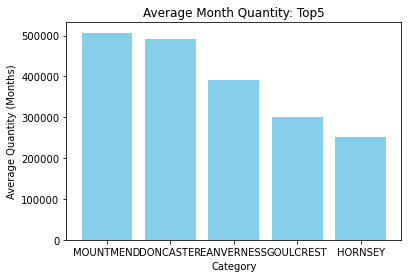

In [70]:
summary_vendor = df1.groupby('InventoryCategory').agg({
    'Quantity': ['sum']
    
})
summary_vendor['Quantity_MonthAVG']=summary_vendor['Quantity']/6
Quantity_MonthAVG = summary_vendor.sort_values(('Quantity_MonthAVG'), ascending=False).head()

plt.bar(top_5_index, Quantity_MonthAVG['Quantity_MonthAVG'], color='skyblue')

plt.title('Average Month Quantity: Top5')
plt.xlabel('Category')
plt.ylabel('Average Quantity (Months)')